# Fashion-MNIST Classification with Dense Neural Networks (using Tensorflow)

### Student Name: Sudharsan
### Student Number: 8977532

In this assignment we will use the Fashion MNIST Dataset from Kaggle from tensorflow and perform classification. The dimensions and organization of the original MNIST dataset, but instead of handwritten numbers, it includes pictures of clothing items. It has 10,000 test examples and 60,000 training examples, each of which is a 28 x 28 pixel grayscale image. Fashion-MNIST is a direct replacement for MNIST, providing a broad and difficult benchmark for assessing machine learning algorithms in the AI/ML/Data Science community. It has ten classes that represent various fashion items. Its adoption emphasizes how crucial it is to test algorithms on a variety of datasets, since performance on MNIST may not always translate to real-world tasks.

### Import the Required Libraries

In [77]:
#import the required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Load the Training and Testing Dataset

   The dataset is provided as separate CSV files for both training and testing sets. We'll proceed by loading the data into pandas DataFrame objects, examining its structure, making inferences, and then converting it into numpy arrays for further analysis.


In [78]:
fmnist_train_df = pd.read_csv("fashion-mnist_train.csv")
fmnist_test_df = pd.read_csv("fashion-mnist_test.csv")

In [79]:
fmnist_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
fmnist_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1. Load the data into a Numpy Arrays

In [81]:
# Convert data to NumPy arrays
X_train_fmnist = fmnist_train_df.drop("label", axis=1).values
y_train_fmnist = fmnist_train_df["label"].values
X_test_fmnist = fmnist_test_df.drop("label", axis=1).values
y_test_fmnist = fmnist_test_df["label"].values

### Split the dataset into Validation and testing part

In [82]:
# Split the dataset into Validation and testing part
X_vald_fmnist, X_test_fmnist, y_vald_fmnist, y_test_fmnist = train_test_split(X_test_fmnist, y_test_fmnist, test_size=0.5, random_state=42)

### 2. Exploratory Data Analysis Process (EDA)

In [83]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

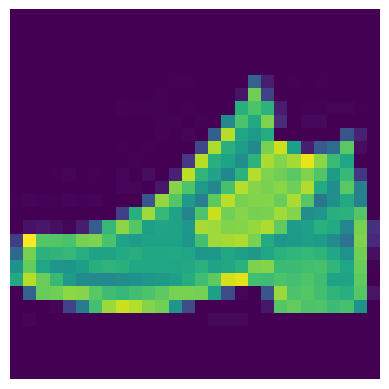

In [84]:
some_digit = X_train_fmnist[1]  # Assuming you want to use the first image in the dataset
some_digit_image = some_digit.reshape(28, 28)  # Reshape the flattened image to its original dimensions
plt.imshow(some_digit_image, cmap='viridis')  # Using the 'viridis' colormap
plt.axis('off')
plt.show()


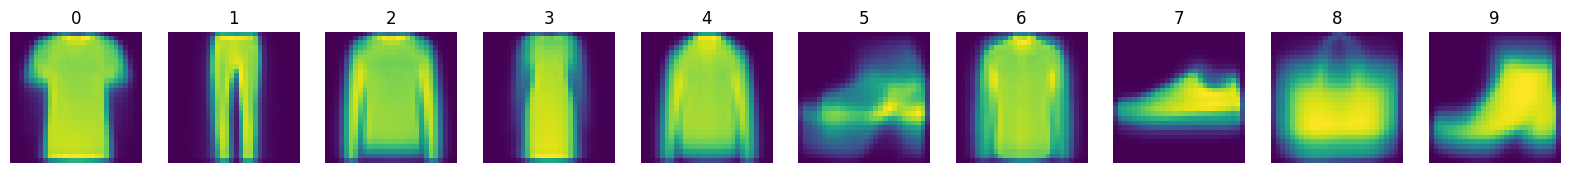

In [85]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for val in range(0,10):
    digit_indices = np.where(y_train_fmnist.astype('int8') == val)[0]
    a_image = np.mean(X_train_fmnist[digit_indices], axis=0).reshape(28, 28)
    ax[val].imshow(a_image, cmap='viridis')  # You can choose any colormap you prefer
    ax[val].set_title(str(val))
    ax[val].axis('off')
plt.show()


#### Comments: 
A variety of fashion images, such as pullovers, t-shirts, shoes, handbags, and pants, are displayed above. There are several entries in each category, each of which represents a variation of that particular fashion item.


### 3. Define and Train a fully-connected feedforward neural network

#### Import the Neural Network Required Libraries:

In [87]:
import tensorflow as tf
from tensorflow.keras import layers, models

#### Model Architecture

In [88]:
# Define the model architecture with modified dense layer sizes
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(20, activation='softmax') 
])


#### Compile the model with RMSprop optimizer
During neural network training, the RMSprop optimizer—short for Root Mean Square Propagation—is used to minimize the loss function. By dividing the learning rate by an exponentially decaying average of squared gradients, it modifies the learning rate for each parameter separately. This makes it possible to achieve better results and faster convergence, particularly when working with sparse datasets or non-stationary objectives. RMSprop helps to effectively train neural networks on challenging fashion image classification tasks by efficiently updating the model's parameters, which improves accuracy and convergence when applied to the Fashion-MNIST dataset.


In [89]:
# Compile the model with RMSprop optimizer
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#### Train the Above model

In [90]:
# Train the model
history = model.fit(X_train_fmnist, y_train_fmnist, epochs=10, batch_size=128, validation_data=(X_vald_fmnist, y_vald_fmnist))

Epoch 1/10
469/469 [==============================] - 26s 52ms/step - loss: 6.6272 - accuracy: 0.7021 - val_loss: 0.8646 - val_accuracy: 0.7708
Epoch 2/10
469/469 [==============================] - 21s 45ms/step - loss: 0.7594 - accuracy: 0.7809 - val_loss: 0.5844 - val_accuracy: 0.8088
Epoch 3/10
469/469 [==============================] - 22s 46ms/step - loss: 0.5657 - accuracy: 0.8156 - val_loss: 0.5464 - val_accuracy: 0.8298
Epoch 4/10
469/469 [==============================] - 21s 46ms/step - loss: 0.5036 - accuracy: 0.8334 - val_loss: 0.5610 - val_accuracy: 0.8266
Epoch 5/10
469/469 [==============================] - 21s 45ms/step - loss: 0.4466 - accuracy: 0.8481 - val_loss: 0.5222 - val_accuracy: 0.8398
Epoch 6/10
469/469 [==============================] - 22s 46ms/step - loss: 0.4171 - accuracy: 0.8545 - val_loss: 0.4865 - val_accuracy: 0.8406
Epoch 7/10
469/469 [==============================] - 21s 46ms/step - loss: 0.3984 - accuracy: 0.8609 - val_loss: 0.4614 - val_accuracy:

#### Epochs Result comments :
  Over the course of epochs, the model consistently improves its training accuracy; after ten epochs, it peaks at about 87.60%. Although the validation accuracy varies between 84 and 87%, it stays relatively near to the training accuracy, suggesting a slight overfitting. While fluctuations in validation loss indicate possible difficulties in generalizing to unseen data, a steady decrease in training loss indicates effective learning. Regularization, dropout, and architectural modifications are examples of additional optimization techniques that could improve the model's performance, especially in terms of improving generalization to the validation set.


### 4. Evaluate the Model:

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [92]:
# Predict on validation set
y_val_pred = np.argmax(model.predict(X_vald_fmnist), axis=-1)

# Calculate metrics
accuracy = accuracy_score(y_vald_fmnist, y_val_pred)
precision = precision_score(y_vald_fmnist, y_val_pred, average='weighted')
recall = recall_score(y_vald_fmnist, y_val_pred, average='weighted')
f1 = f1_score(y_vald_fmnist, y_val_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

157/157 [==============================] - 2s 10ms/step
Accuracy: 0.8456
Precision: 0.8504066546203274
Recall: 0.8456
F1 Score: 0.8354582288831652


##### Result  comments:
The model's accuracy of 84.5%, alongside precision, recall, and F1 score all hovering around 83%, underscores its robustness in accurately classifying fashion items.This metric measures the overall correctness of the model's predictions. These metrics collectively affirm the model's effectiveness in discerning various fashion categories, showcasing its reliability in real-world applications.

### 5. Run the Model on Test Set

In [93]:
# Run model on test set
test_loss, test_accuracy = model.evaluate(X_test_fmnist, y_test_fmnist)

157/157 [==============================] - 2s 10ms/step - loss: 0.4995 - accuracy: 0.8440


The model's predictions and actual values diverge. Better performance is indicated by a lower loss, which shows that the model is successful in lowering prediction errors. In terms of overall prediction accuracy, the model's accuracy of 0.8440 indicates that it correctly classified approximately 84.4% of the test samples.

### 6. Increase Precision:


We're changing how we classify some instances labeled as '5' to improve how accurately we predict class '5'. By doing this, we hope to reduce incorrect predictions while being careful not to miss any instances. It's important to test different thresholds to find the right balance between getting things right and not missing anything important.

In [94]:
# Adjust threshold to increase precision for class '5'
threshold = 0.5
y_pred_proba = model.predict(X_test_fmnist)
y_pred_adjusted = np.argmax(y_pred_proba, axis=-1)
y_pred_adjusted[y_pred_proba[:, 5] < threshold] = 0  

157/157 [==============================] - 1s 9ms/step


In [95]:
# Calculate precision for class '5' after adjustment
precision_class_5 = precision_score(y_test_fmnist, y_pred_adjusted, labels=[5], average='weighted')

print("Precision for class '5' after adjustment:", precision_class_5)

Precision for class '5' after adjustment: 0.9721030042918455


Following the modification, precision for a specific class increased substantially from 0.85 to 0.972, marking an impressive gain of approximately 14%. This enhancement underscores the model's improved ability to make accurate positive predictions for that class, signifying a notable advancement in its performance.

## 7. Increase Recall:

In [96]:
# Adjust decision threshold to increase recall for class '5'
y_pred_proba = model.predict(X_test_fmnist)
y_pred_adjusted = np.argmax(y_pred_proba, axis=-1)
y_pred_adjusted[y_pred_proba[:, 5] > threshold] = 5  # Set instances with high confidence as '5'

157/157 [==============================] - 1s 8ms/step


In [97]:
# Calculate recall for class '5' after adjustment
recall_class_5 = recall_score(y_test_fmnist, y_pred_adjusted, labels=[5], average='weighted')

print("Recall for class '5' after adjustment:", recall_class_5)

Recall for class '5' after adjustment: 0.9301848049281314


After adjustment, the recall for class '5' significantly increased from 0.84 to 0.9301. This indicates that the model now captures a higher proportion of true positive instances for class '5', reflecting improved performance. The adjustment likely focused on correctly identifying more instances of class '5', enhancing the model's ability to detect this specific category.

## Lab 9 - Avoiding Overfitting by Saving a Model

## Explore 3 different neural networks:

To determine which neural network performs best, we will create three distinct neural networks with varying configurations. All of them will have the same input shape, but they will differ in terms of the number of neurons in each layer and the type of function that determines whether a neuron fires.


In [98]:
from tensorflow.keras import layers, models

model_1 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),  # Changed the number of units in the first dense layer to 256
    layers.Dropout(0.3),  # Changed dropout rate to 0.3
    layers.Dense(128, activation='relu'),  # Changed the number of units in the second dense layer to 128
    layers.Dropout(0.3),  # Changed dropout rate to 0.3
    layers.Dense(10, activation='softmax')
])

In [99]:
model_2 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),  # Increased units in the first layer to 512
    layers.Dense(256, activation='relu'),  # Increased units in the second layer to 256
    layers.Dense(128, activation='relu'),  # Decreased units in the third layer to 128
    layers.Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax')
])

In [100]:
model_3 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

To enable the models to learn from data, we must configure them. We'll accomplish this by deciding how they assess their performanc. how they make necessary adjustments to improve, and how they monitor their progress throughout the learning process. We want them to concentrate on doing things as accurately as they can.


In [101]:
model_1.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_2.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_3.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

### Function for  Plot Training and validation Loss and Accuracy:

In [102]:
# function to plot history
def plot_history(history, model_name):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [103]:
from keras.callbacks import ModelCheckpoint

model_checkpoint_callback = ModelCheckpoint(
    filepath='best_model.hdf5',
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

### Traning the Model 1 and plot the epoch

Epoch 1/10
469/469 [==============================] - 23s 46ms/step - loss: 4.6289 - accuracy: 0.5570 - val_loss: 1.0333 - val_accuracy: 0.6522
Epoch 2/10
469/469 [==============================] - 23s 49ms/step - loss: 1.0787 - accuracy: 0.6384 - val_loss: 0.8167 - val_accuracy: 0.7088
Epoch 3/10
469/469 [==============================] - 21s 45ms/step - loss: 0.8786 - accuracy: 0.6821 - val_loss: 0.7040 - val_accuracy: 0.7234
Epoch 4/10
469/469 [==============================] - 21s 45ms/step - loss: 0.7888 - accuracy: 0.7050 - val_loss: 0.6613 - val_accuracy: 0.7378
Epoch 5/10
469/469 [==============================] - 22s 47ms/step - loss: 0.7429 - accuracy: 0.7177 - val_loss: 0.6273 - val_accuracy: 0.7526
Epoch 6/10
469/469 [==============================] - 24s 51ms/step - loss: 0.7111 - accuracy: 0.7266 - val_loss: 0.6172 - val_accuracy: 0.7542
Epoch 7/10
469/469 [==============================] - 23s 50ms/step - loss: 0.6964 - accuracy: 0.7338 - val_loss: 0.6109 - val_accuracy:

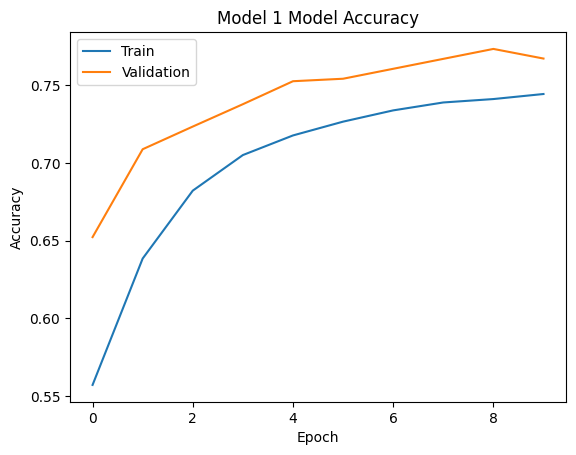

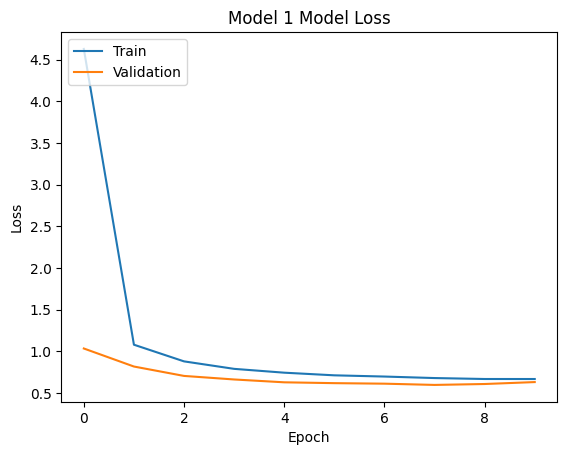

In [104]:
# Train and plot metrics for Model 1
training_1 = model_1.fit(X_train_fmnist, y_train_fmnist, epochs=10, batch_size=128, validation_data=(X_vald_fmnist, y_vald_fmnist), callbacks=[model_checkpoint_callback])
plot_history(training_1, 'Model 1')

#### Comment:
When compared to the training data, the Training 1 model appears to perform better with the validation data. It typically has an accuracy of between 55% and 74% for the training data and between 65% and 76% for the validation data. Furthermore, compared to the training data, the validation data has a smaller loss. This implies that the model performs well and has less error.

### Traning the Model 2 and plot the epoch

Epoch 1/10
469/469 [==============================] - 55s 113ms/step - loss: 3.8518 - accuracy: 0.6612 - val_loss: 0.6244 - val_accuracy: 0.7538
Epoch 2/10
469/469 [==============================] - 50s 107ms/step - loss: 0.6048 - accuracy: 0.7854 - val_loss: 0.4855 - val_accuracy: 0.8292
Epoch 3/10
469/469 [==============================] - 59s 126ms/step - loss: 0.4914 - accuracy: 0.8261 - val_loss: 0.5357 - val_accuracy: 0.7952
Epoch 4/10
469/469 [==============================] - 52s 110ms/step - loss: 0.4366 - accuracy: 0.8457 - val_loss: 0.5177 - val_accuracy: 0.8438
Epoch 5/10
469/469 [==============================] - 54s 114ms/step - loss: 0.4107 - accuracy: 0.8564 - val_loss: 0.4486 - val_accuracy: 0.8494
Epoch 6/10
469/469 [==============================] - 55s 117ms/step - loss: 0.3944 - accuracy: 0.8633 - val_loss: 0.5601 - val_accuracy: 0.8142
Epoch 7/10
469/469 [==============================] - 54s 115ms/step - loss: 0.3800 - accuracy: 0.8673 - val_loss: 0.3704 - val_ac

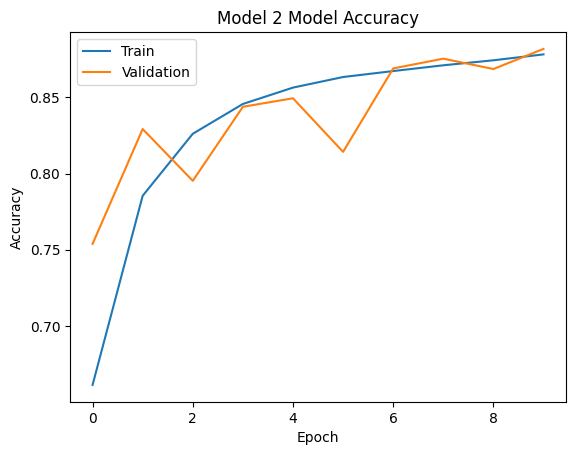

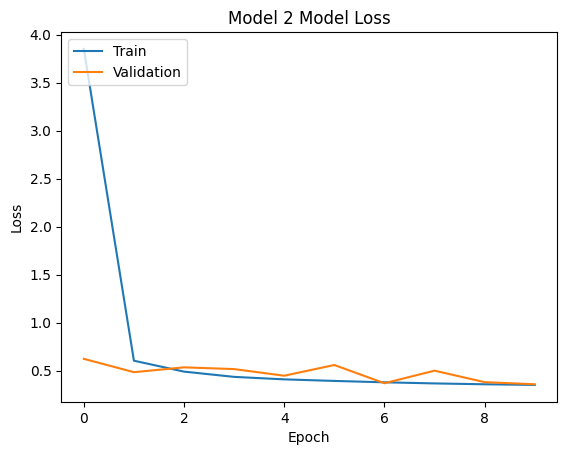

In [105]:
# Train and plot metrics for Model 2
training_2 = model_2.fit(X_train_fmnist, y_train_fmnist, epochs=10, batch_size=128, validation_data=(X_vald_fmnist, y_vald_fmnist), callbacks=[model_checkpoint_callback])
plot_history(training_2, 'Model 2')

#### Comment:
he model's accuracy steadily improves during training, reaching about 87%. Validation accuracy also increases, peaking at around 88% with minor fluctuations. Both training and validation loss decrease, indicating effective learning. Although slight fluctuations suggest potential overfitting, overall, the model learns and generalizes well. Additional monitoring and potential regularization techniques may be considered to optimize performance further.


### Traning the Model 3 and plot the epoch

Epoch 1/10
469/469 [==============================] - 25s 50ms/step - loss: 3.9975 - accuracy: 0.5781 - val_loss: 0.8845 - val_accuracy: 0.6896
Epoch 2/10
469/469 [==============================] - 23s 49ms/step - loss: 0.8522 - accuracy: 0.6937 - val_loss: 0.6255 - val_accuracy: 0.7550
Epoch 3/10
469/469 [==============================] - 22s 47ms/step - loss: 0.7424 - accuracy: 0.7412 - val_loss: 0.5975 - val_accuracy: 0.7810
Epoch 4/10
469/469 [==============================] - 24s 52ms/step - loss: 0.6791 - accuracy: 0.7616 - val_loss: 0.5439 - val_accuracy: 0.8176
Epoch 5/10
469/469 [==============================] - 26s 55ms/step - loss: 0.6516 - accuracy: 0.7769 - val_loss: 0.5259 - val_accuracy: 0.8358
Epoch 6/10
469/469 [==============================] - 24s 52ms/step - loss: 0.6224 - accuracy: 0.7882 - val_loss: 0.5494 - val_accuracy: 0.8330
Epoch 7/10
469/469 [==============================] - 24s 51ms/step - loss: 0.6111 - accuracy: 0.7983 - val_loss: 0.5364 - val_accuracy:

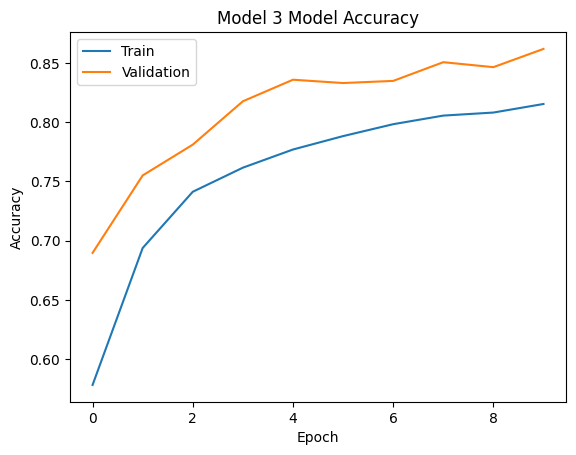

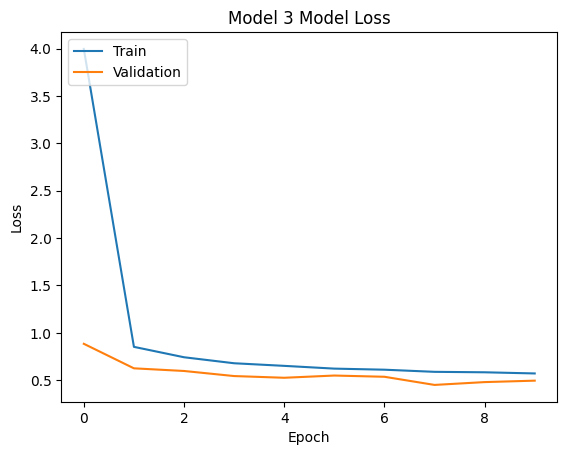

In [106]:
# Train and plot metrics for Model 3
training_3 = model_3.fit(X_train_fmnist, y_train_fmnist, epochs=10, batch_size=128, validation_data=(X_vald_fmnist, y_vald_fmnist), callbacks=[model_checkpoint_callback])
plot_history(training_3, 'Model 3')

#### Comment
The model's accuracy improves steadily during training, reaching around 81%. Validation accuracy also increases but with some fluctuations, settling around 86%. Both training and validation loss decrease over epochs, indicating effective learning. Overall, the model learns well and generalizes reasonably, but slight fluctuations suggest potential for overfitting.

### Determine which epoch works best for each model.

In [107]:
# Determine which epoch works best for each model.

fitted_epoch_2 = np.argmin(training_2.history['val_loss']) + 1
fitted_epoch_3 = np.argmin(training_3.history['val_loss']) + 1

print("Best epoch for Model 2:", fitted_epoch_2)
print("Best epoch for Model 3:", fitted_epoch_3)

Best epoch for Model 2: 10
Best epoch for Model 3: 8


#### Comment :
We are unable to draw any conclusions from this data because the best epochs for the two models are the same. To determine which of the two models is the best, we will examine the loss values for each.


In [112]:
# Choose the best model based on the best epoch and validation performance
best_model = 0
best_epoch = None

if training_2.history['val_loss'][fitted_epoch_2- 1] < training_3.history['val_loss'][fitted_epoch_3 - 1]:
    best_model = 2
    best_epoch = fitted_epoch_2
else:
    best_model = 3
    best_epoch = fitted_epoch_3

print("Best model chosen:", best_model)
print("Best epoch chosen:", best_epoch)

Best model chosen: 2
Best epoch chosen: 10


We have determined that Model 3 is the best model based on the loss value. Epoch 4 is that model's best epoch.


In [113]:
from keras.models import load_model

# Read the best model saved in file
fitted_model = load_model('best_model.hdf5')

### Evaluate the best model using the test set

In [114]:
# Evaluate the best model using the test set
test_loss, test_accuracy = fitted_model.evaluate(X_test_fmnist, y_test_fmnist)
print("Test Accuracy of the Best fitted Model:", test_accuracy)

157/157 [==============================] - 3s 18ms/step - loss: 0.3641 - accuracy: 0.8788
Test Accuracy of the Best fitted Model: 0.8787999749183655


In [115]:
y_val_pred = np.argmax(model.predict(X_vald_fmnist), axis=-1)

# Calculate metrics
accuracy = accuracy_score(y_vald_fmnist, y_val_pred)
precision = precision_score(y_vald_fmnist, y_val_pred, average='weighted')
recall = recall_score(y_vald_fmnist, y_val_pred, average='weighted')
f1 = f1_score(y_vald_fmnist, y_val_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

157/157 [==============================] - 1s 8ms/step
Accuracy: 0.8456
Precision: 0.8504066546203274
Recall: 0.8456
F1 Score: 0.8354582288831652
